#### Importação das Bibliotecas

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../datasets/vendas_regiao.csv', sep=',', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Cliente    1000 non-null   int64  
 1   Nome_Cliente  1000 non-null   object 
 2   id_estado     1000 non-null   int64  
 3   sigla         1000 non-null   object 
 4   estado        1000 non-null   object 
 5   regiao        1000 non-null   object 
 6   ID_Venda      1000 non-null   int64  
 7   Data          1000 non-null   object 
 8   SKU_Produto   1000 non-null   object 
 9   Categoria     1000 non-null   object 
 10  Nome_Produto  1000 non-null   object 
 11  Quantidade    1000 non-null   int64  
 12  Preco         1000 non-null   float64
 13  valor_venda   1000 non-null   float64
 14  Canal         1000 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [4]:
df.describe()

,ID_Cliente,id_estado,ID_Venda,Quantidade,Preco,valor_venda
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,253.590000,14.272000,500.500000,5.353000,675.775260,3584.756530
std,144.932706,7.974811,288.819436,2.897376,1234.496185,7500.956132
min,1.000000,1.000000,1.000000,1.000000,35.830000,35.830000
25%,128.000000,7.000000,250.750000,3.000000,123.170000,449.752500
50%,254.000000,15.000000,500.500000,5.000000,166.940000,979.760000
75%,382.000000,21.000000,750.250000,8.000000,491.410000,2166.240000
max,500.000000,27.000000,1000.000000,10.000000,5602.010000,56020.100000


In [5]:
df.sample(5)

,ID_Cliente,Nome_Cliente,id_estado,sigla,estado,regiao,ID_Venda,Data,SKU_Produto,Categoria,Nome_Produto,Quantidade,Preco,valor_venda,Canal
731,374,Enrico Almeida,27,TO,Tocantins,Norte,791,2023-08-07,SKU-42823,Eletrônicos,TV LED,2,4350.20,8700.40,Online
141,74,Yuri Campos,24,SC,Santa Catarina,Sul,140,2023-07-13,SKU-94109,Brinquedos,Kit de Cozinha Infantil,8,136.43,1091.44,Online
178,89,Lorenzo da Mata,23,RR,Roraima,Norte,515,2023-06-28,SKU-35933,Esporte,Halteres de Academia,3,249.82,749.46,Online
270,139,Marcos Vinicius Cardoso,10,MA,Maranhão,Nordeste,674,2023-05-28,SKU-50055,Esporte,Luva de Boxe,9,98.09,882.81,Online
10,6,Luiz Otávio Correia,7,DF,Distrito Federal,Centro-Oeste,895,2023-08-29,SKU-54960,Eletrônicos,Fone de Ouvido Bluetooth,10,128.90,1289.00,Loja Física


In [6]:
df_vendas_regiao = df.groupby(['regiao','Canal'])['valor_venda'].sum().reset_index()
df_vendas_regiao.sort_values(by='valor_venda',ascending=False,inplace=True)
df_vendas_regiao

,regiao,Canal,valor_venda
3,Nordeste,Online,758777.45
4,Norte,Loja Física,583467.33
2,Nordeste,Loja Física,559776.56
5,Norte,Online,430254.68
1,Centro-Oeste,Online,318851.53
9,Sul,Online,233708.81
6,Sudeste,Loja Física,228608.08
8,Sul,Loja Física,221261.09
0,Centro-Oeste,Loja Física,135031.15
7,Sudeste,Online,115019.85


#### Gráfico de Barras
***
Um gráfico de barras é uma representação visual que usa barras retangulares para mostrar e comparar valores entre diferentes categorias. Cada barra representa uma categoria e seu tamanho é proporcional ao valor que representa. Esse tipo de gráfico é útil para visualizar e comparar dados de forma clara, sendo amplamente utilizado em relatórios, pesquisas e análises estatísticas.

Text(0, 0.5, 'Valor das Vendas')

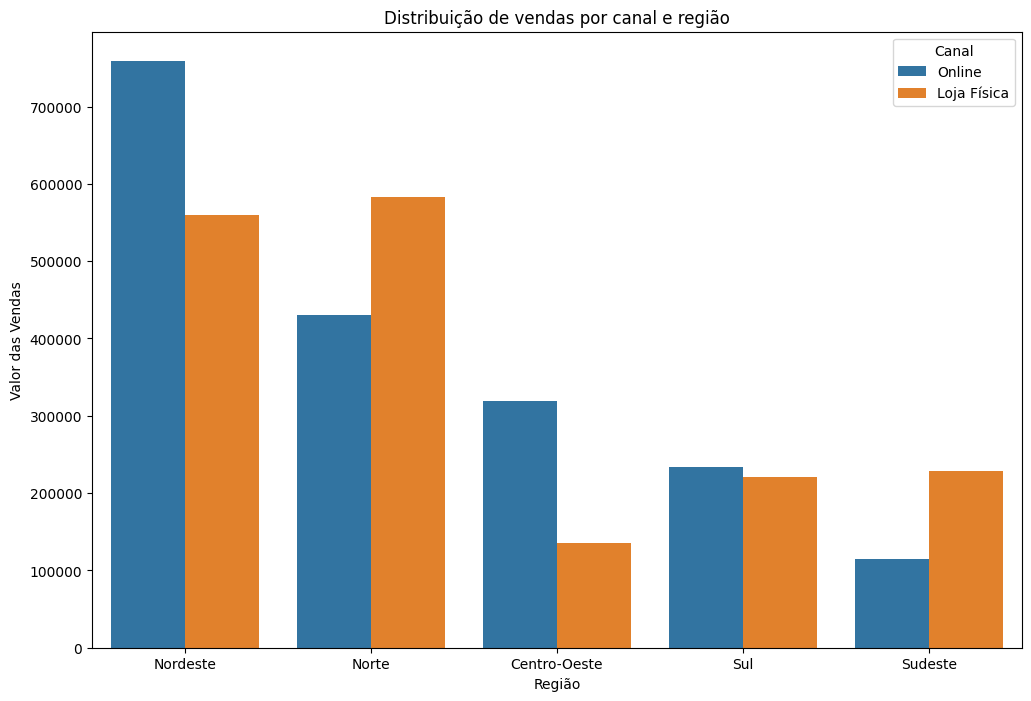

In [12]:
plt.figure(figsize=(12,8))

sns.barplot(data=df_vendas_regiao,
            x='regiao',
            y='valor_venda',
            hue='Canal')

plt.title('Distribuição de vendas por canal e região')
plt.xlabel('Região')
plt.ylabel('Valor das Vendas')

In [14]:
df.info() #Coluna data é do tipo objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Cliente    1000 non-null   int64  
 1   Nome_Cliente  1000 non-null   object 
 2   id_estado     1000 non-null   int64  
 3   sigla         1000 non-null   object 
 4   estado        1000 non-null   object 
 5   regiao        1000 non-null   object 
 6   ID_Venda      1000 non-null   int64  
 7   Data          1000 non-null   object 
 8   SKU_Produto   1000 non-null   object 
 9   Categoria     1000 non-null   object 
 10  Nome_Produto  1000 non-null   object 
 11  Quantidade    1000 non-null   int64  
 12  Preco         1000 non-null   float64
 13  valor_venda   1000 non-null   float64
 14  Canal         1000 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [19]:
df['Data'] = pd.to_datetime(df['Data']) #Coluna data é convertida para o tipo datetime64
df['Mês'] = df['Data'].dt.month #Feature engenier
df['Data_mes'] = df['Data'].dt.to_period('M')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Cliente    1000 non-null   int64         
 1   Nome_Cliente  1000 non-null   object        
 2   id_estado     1000 non-null   int64         
 3   sigla         1000 non-null   object        
 4   estado        1000 non-null   object        
 5   regiao        1000 non-null   object        
 6   ID_Venda      1000 non-null   int64         
 7   Data          1000 non-null   datetime64[ns]
 8   SKU_Produto   1000 non-null   object        
 9   Categoria     1000 non-null   object        
 10  Nome_Produto  1000 non-null   object        
 11  Quantidade    1000 non-null   int64         
 12  Preco         1000 non-null   float64       
 13  valor_venda   1000 non-null   float64       
 14  Canal         1000 non-null   object        
 15  Mês           1000 non-null   int32    

In [20]:
df.sample(10)

,ID_Cliente,Nome_Cliente,id_estado,sigla,estado,regiao,ID_Venda,Data,SKU_Produto,Categoria,Nome_Produto,Quantidade,Preco,valor_venda,Canal,Mês,Data_mes
606,305,Isadora Nascimento,10,MA,Maranhão,Nordeste,49,2023-03-22,SKU-37873,Casa,Ventilador de Mesa,3,270.78,812.34,Online,3,2023-03
641,325,Murilo Alves,15,PB,Paraíba,Nordeste,806,2023-06-14,SKU-49210,Eletrônicos,Tablet,5,715.28,3576.40,Loja Física,6,2023-06
425,223,André Dias,10,MA,Maranhão,Nordeste,153,2023-01-15,SKU-10344,Brinquedos,Brinquedo Educativo,3,79.47,238.41,Loja Física,1,2023-01
297,152,Ana Luiza Novaes,8,ES,Espírito Santo,Sudeste,211,2023-09-16,SKU-86759,Eletrônicos,Smartwatch,2,185.34,370.68,Online,9,2023-09
399,205,Fernando da Costa,17,PE,Pernambuco,Nordeste,329,2023-11-30,SKU-56364,Casa,Conjunto de Talheres,1,68.89,68.89,Loja Física,11,2023-11
622,315,Lorenzo Nogueira,25,SP,São Paulo,Sudeste,884,2023-07-24,SKU-21352,Roupas,Saia Midi,9,123.24,1109.16,Loja Física,7,2023-07
144,74,Yuri Campos,24,SC,Santa Catarina,Sul,700,2023-08-25,SKU-97371,Esporte,Patins,4,237.06,948.24,Online,8,2023-08
509,260,João Gabriel da Costa,4,AM,Amazonas,Norte,669,2023-07-10,SKU-92162,Eletrônicos,Alto-falante Bluetooth,5,1198.31,5991.55,Loja Física,7,2023-07
889,447,Eloah Ramos,22,RO,Rondônia,Norte,823,2023-04-28,SKU-19189,Brinquedos,Blocos de Montar,2,167.64,335.28,Loja Física,4,2023-04
752,383,Sr. Vitor Araújo,6,CE,Ceará,Nordeste,84,2023-05-23,SKU-47207,Esporte,Bicicleta Mountain Bike,7,1671.59,11701.13,Loja Física,5,2023-05


In [26]:
grouped = df.groupby(['Data_mes','regiao','Canal'])
vendas_mensais = grouped.agg(total_vendas = ('valor_venda','sum')).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Cliente    1000 non-null   int64         
 1   Nome_Cliente  1000 non-null   object        
 2   id_estado     1000 non-null   int64         
 3   sigla         1000 non-null   object        
 4   estado        1000 non-null   object        
 5   regiao        1000 non-null   object        
 6   ID_Venda      1000 non-null   int64         
 7   Data          1000 non-null   datetime64[ns]
 8   SKU_Produto   1000 non-null   object        
 9   Categoria     1000 non-null   object        
 10  Nome_Produto  1000 non-null   object        
 11  Quantidade    1000 non-null   int64         
 12  Preco         1000 non-null   float64       
 13  valor_venda   1000 non-null   float64       
 14  Canal         1000 non-null   object        
 15  Mês           1000 non-null   int32    

In [34]:
vendas_mensais['Data_mes'] = vendas_mensais['Data_mes'].dt.to_timestamp()
# vendas_mensais.sample(10)
vendas_mensais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data_mes      119 non-null    datetime64[ns]
 1   regiao        119 non-null    object        
 2   Canal         119 non-null    object        
 3   total_vendas  119 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.8+ KB


Text(0, 0.5, 'Total de vendas')

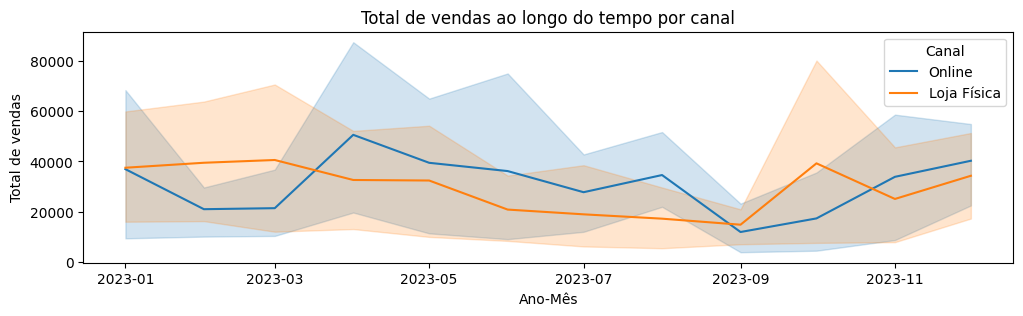

In [42]:
plt.figure(figsize=(12,3))
sns.lineplot(data=vendas_mensais,
             x='Data_mes',
             y='total_vendas',
             hue='Canal',
             markers='o')
plt.title('Total de vendas ao longo do tempo por canal')
plt.xlabel('Ano-Mês')
plt.ylabel('Total de vendas')

#### Gráfico de Dispersão
***
Um gráfico de dispersão é uma representação visual usada para mostrar a relação entre duas variáveis. Nele, cada ponto no gráfico indica a posição de um par de valores, com um valor no eixo X e outro no eixo Y. Esse tipo de gráfico é ideal para identificar padrões, correlações ou tendências entre as variáveis, como a ligação entre a altura e o peso de indivíduos, ou o impacto de uma variável sobre outra. É amplamente utilizado em análises estatísticas, pesquisa científica e estudos de mercado para visualizar como duas variáveis podem estar relacionadas.

In [43]:
df = pd.read_csv('../../datasets/dados_clientes_clusterizado.csv',sep=';',encoding='latin1')

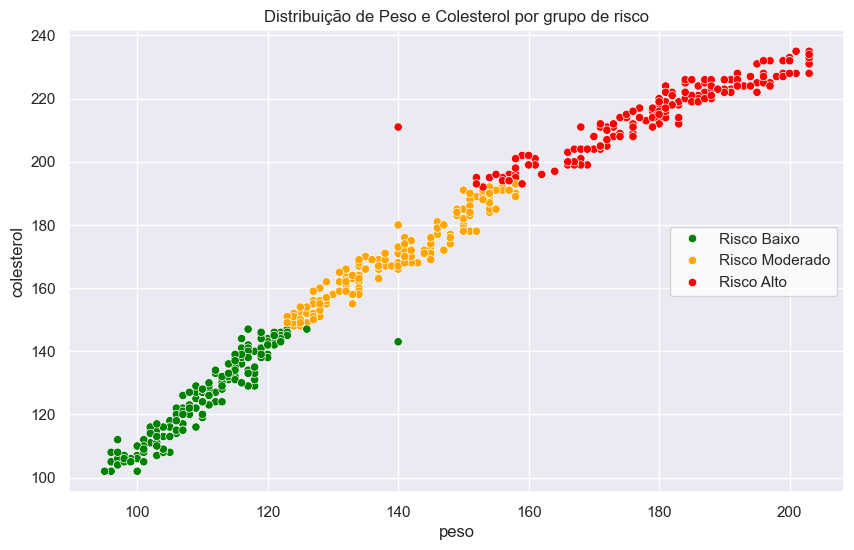

In [52]:
plt.figure(figsize=(10,6)),
sns.set(style='darkgrid')

scatter_plot=sns.scatterplot(data=df,
                x='peso',
                y='colesterol',
                hue='nome_cluster',
                palette={'Risco Baixo':'green','Risco Moderado':'orange','Risco Alto':'red'})

scatter_plot.legend(loc='center right',facecolor = 'white')
plt.title('Distribuição de Peso e Colesterol por grupo de risco')
plt.show()

#### Gráfico de Histograma
***
Um histograma é uma representação visual que ilustra a distribuição de um conjuento de dados, destacando a frequência de ocorrência em diferentes intervalos. Ele exibe a contagem de dados dentro de intervalos específicos, facilitando a visualização da dispersão e da concentração dos dados. 

No gráfico, as "barras" representam os invervalos, ou "bins", com a altura de cada barra indicando a quantidade de dados que caem dentro daquele intervalo. A largura das barras corresponde ao tamanho dos invervalos. O histograma permite a rápida identificação de padrões, como picos e lacunas, e ajuda a compreender a forma geral da distribuição dos dados. É amplamente utilizado em análises exploratórias para avaliar a distribuição e a variabilidade dos dados.

In [53]:
df.head()

,sigla_estado,peso,colesterol,nome_cluster
0,RR,102.0,111,Risco Baixo
1,DF,115.0,135,Risco Baixo
2,AM,115.0,136,Risco Baixo
3,SE,130.0,158,Risco Moderado
4,ES,198.0,227,Risco Alto


<Axes: xlabel='peso', ylabel='Count'>

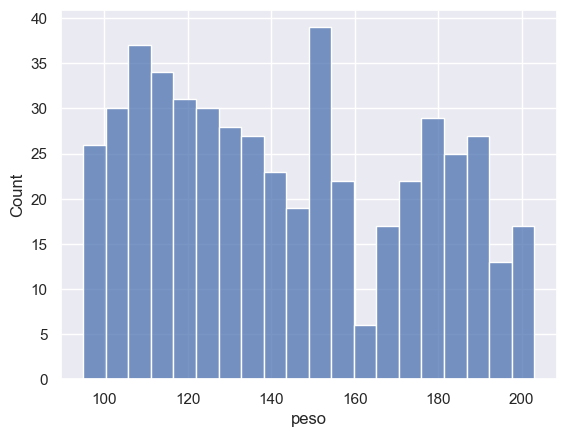

In [55]:
sns.histplot(data=df,x='peso',bins=20)

<Axes: xlabel='colesterol', ylabel='Count'>

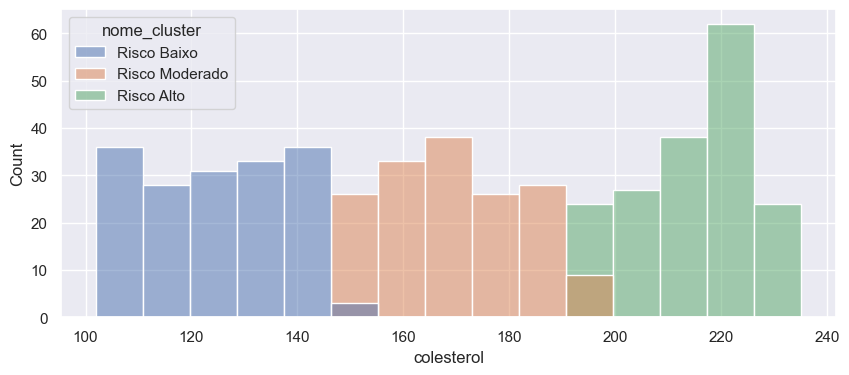

In [62]:
plt.figure(figsize=(10,4))
filtro = df['sigla_estado'] == 'DF'
sns.histplot(data=df[filtro],x='colesterol',bins=15, hue = 'nome_cluster' )

#### Gráfico Boxplot
***
Um boxplot é uma representação visual que resume a distribuição de um conjunto de dados, destacando seus principais estatísticos. Ele exibe a mediana, os quartis e os valores extremos, permitindo uma rápida identificação de assimetrias, dispersão e possíveis outliers. 

No gráfico, a "caixa" central mostra a distribuição dos 50% do meio dos dados, com a linha dentro da caixa representando a mediana. As "linhas" se estendem até os valores mínimos e máximos, enquanto pontos fora dessas linhas indicam outliers. O boxplot é amplamente utilizado em análises exploratórias de dados para comparar distribuições entre diferentes grupos ou conjuntos de dados.

In [65]:
df.head()

,sigla_estado,peso,colesterol,nome_cluster
0,DF,102.0,111,Risco Baixo
1,DF,115.0,135,Risco Baixo
2,DF,115.0,136,Risco Baixo
3,DF,130.0,158,Risco Moderado
4,DF,198.0,227,Risco Alto


Text(0, 0.5, 'Descrição do Cluster')

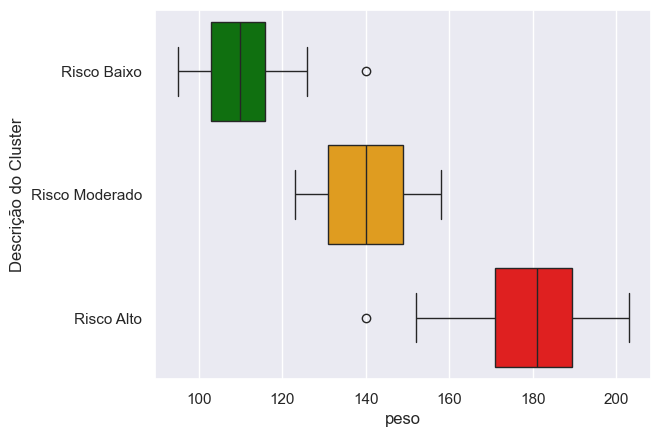

In [68]:
sns.boxplot(data=df,
            x='peso',
            y='nome_cluster', 
            orient='h', 
            hue='nome_cluster',
            palette={'Risco Baixo':'green','Risco Moderado':'orange','Risco Alto':'red'})

plt.ylabel('Descrição do Cluster')

plt.show()


#### Gráfico de FaceGrind
***

In [71]:
vendas_mensais.head()

,Data_mes,regiao,Canal,total_vendas
0,2023-01-01,Centro-Oeste,Online,37773.76
1,2023-01-01,Nordeste,Loja Física,21218.55
2,2023-01-01,Nordeste,Online,99078.20
3,2023-01-01,Norte,Loja Física,45160.63
4,2023-01-01,Norte,Online,42990.78


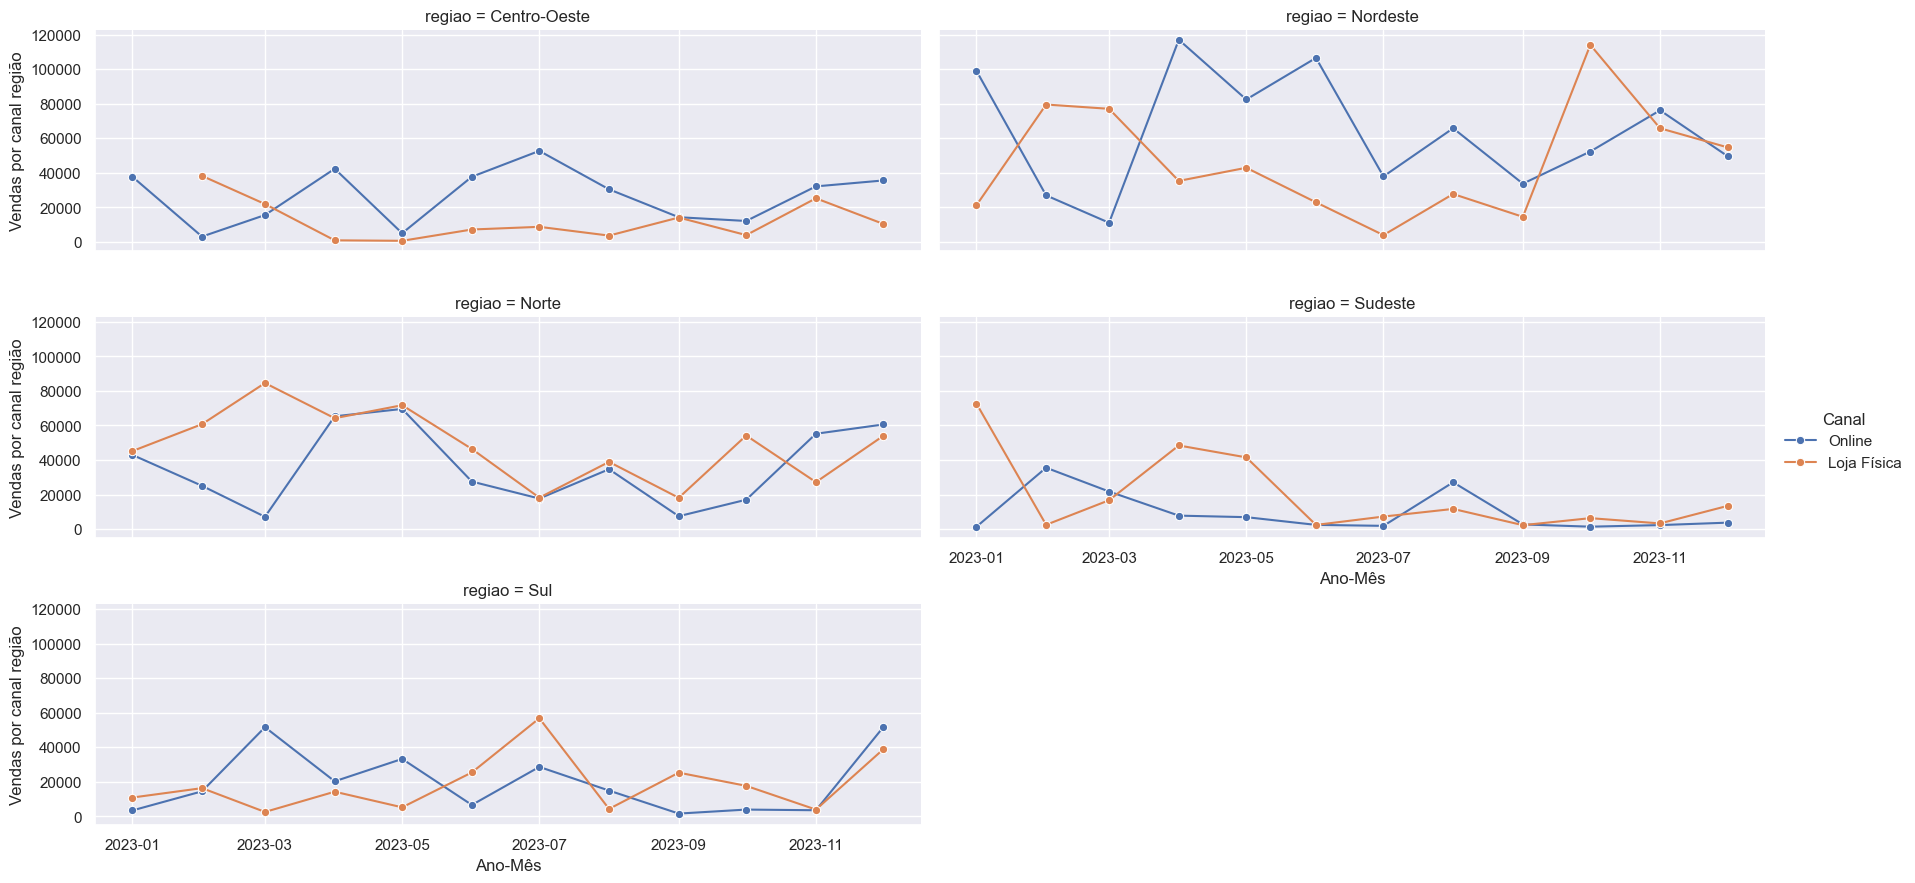

In [81]:
g = sns.FacetGrid(data=vendas_mensais, 
              col='regiao',
              hue='Canal',
              col_wrap=2,
              height=3,
              aspect=3)

g.map(sns.lineplot, 'Data_mes','total_vendas', marker='o')
g.add_legend()
g.set_axis_labels('Ano-Mês','Vendas por canal região')